In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("Gemini_1INCHUSD_1h.csv", index_col = ['date'], parse_dates = True)
data_df_1 = data[['open', 'high', 'low', 'close', 'Volume 1INCH', 'Volume USD']]
data_df_1.head(n=5)

,open,high,low,close,Volume 1INCH,Volume USD
date,,,,,,
2022-04-27 00:00:00,1.2871,1.2932,1.2865,1.2888,428.840257,552.689323
2022-04-26 23:00:00,1.2968,1.2970,1.2589,1.2871,1189.529669,1531.043637
2022-04-26 22:00:00,1.3093,1.3124,1.2961,1.2968,1281.291941,1661.579389
2022-04-26 21:00:00,1.2981,1.3116,1.2959,1.3093,2868.856831,3756.194249
2022-04-26 20:00:00,1.3053,1.3095,1.2900,1.2981,2084.128819,2705.407620


In [3]:
#We'll use a second dataframe to store the open, high, low, and close token data
data_df_2 = data[['open', 'high', 'low', 'close']]
data_df_2.head(n=5)

,open,high,low,close
date,,,,
2022-04-27 00:00:00,1.2871,1.2932,1.2865,1.2888
2022-04-26 23:00:00,1.2968,1.2970,1.2589,1.2871
2022-04-26 22:00:00,1.3093,1.3124,1.2961,1.2968
2022-04-26 21:00:00,1.2981,1.3116,1.2959,1.3093
2022-04-26 20:00:00,1.3053,1.3095,1.2900,1.2981


In [4]:
def plot_preds(test, predicted):
    plt.plot(test, color='red',label='Gemini Token Analysis')
    plt.plot(predicted, color='blue',label='Gemini Token Analysise')
    plt.title('Gemini Token Analysis')
    plt.xlabel('Date')
    plt.ylabel('Token Price')
    plt.legend()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [5]:
n_train_rows = int(data_df_2.shape[0] * 0.8)-1

train = data_df_2.iloc[n_train_rows:, :]
test = data_df_2.iloc[:n_train_rows, :]
print(train.shape)
print(test.shape)


def scaling_func(train_set, test_set):
    train = train_set
    test = test_set
    
    scaler = MinMaxScaler(feature_range = (0,1))
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.fit_transform(test)
    return train_scaled, test_scaled

scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

print(train_scaled.shape, test_scaled.shape)

(394, 4)
(1571, 4)
(394, 4) (1571, 4)


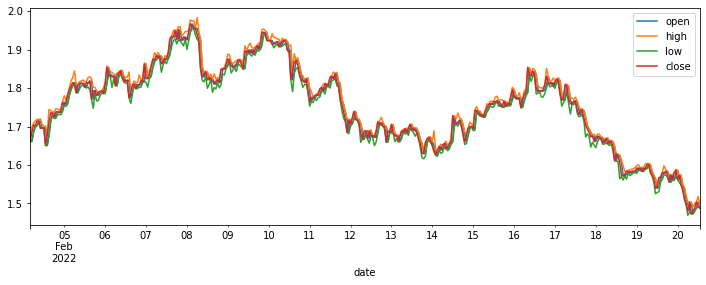

In [6]:
train_plot = train.plot(figsize = (12,4))
train_plot.set_label("Training Data: March & April")

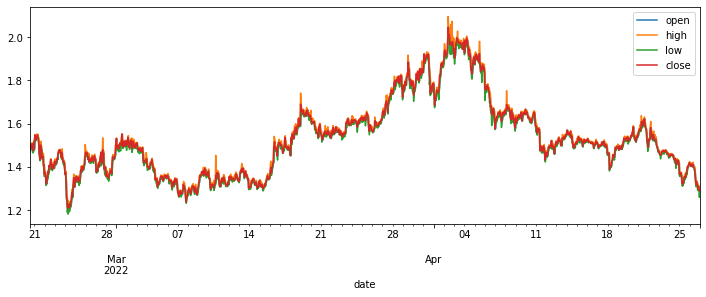

In [7]:
test_plot = test.plot(figsize = (12,4))
test_plot.set_label("Testing Data: March & April")

In [8]:
X_train = []
y_train = []

steps = 50

for i in range(steps, train_scaled.shape[0] - steps):
    X_train.append(train_scaled[i - steps:i, :])
    y_train.append(train_scaled[i, :])

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(294, 50, 4) (294, 4)


In [9]:
X_test, y_test = [], []

for i in range(steps, test_scaled.shape[0] - steps):
    X_test.append(test_scaled[i-steps:i, :])
    y_test.append(test_scaled[i, :])

X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)

(1471, 50, 4) (1471, 4)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 4)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4)
])

model.compile(loss = 'mse', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            11000     
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [11]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
10/10 [==============================] - 6s 51ms/step - loss: 0.2787
Epoch 2/50
10/10 [==============================] - 1s 53ms/step - loss: 0.0578
Epoch 3/50
10/10 [==============================] - 1s 58ms/step - loss: 0.0338
Epoch 4/50
10/10 [==============================] - 1s 63ms/step - loss: 0.0301
Epoch 5/50
10/10 [==============================] - 1s 67ms/step - loss: 0.0247
Epoch 6/50
10/10 [==============================] - 1s 59ms/step - loss: 0.0240
Epoch 7/50
10/10 [==============================] - 1s 63ms/step - loss: 0.0202
Epoch 8/50
10/10 [==============================] - 1s 72ms/step - loss: 0.0199: 0s - loss: 0
Epoch 9/50
10/10 [==============================] - 1s 73ms/step - loss: 0.0185
Epoch 10/50
10/10 [==============================] - 1s 68ms/step - loss: 0.0187
Epoch 11/50
10/10 [==============================] - 1s 76ms/step - loss: 0.0188
Epoch 12/50
10/10 [==============================] - 1s 70ms/step - loss: 0.0131
Epoch 13/50
10/10 [====

In [12]:
results = model.evaluate(X_test, y_test, batch_size = 32)
print("Test loss: ", results)

46/46 [==============================] - 2s 14ms/step - loss: 0.0028
Test loss:  0.0027710634749382734


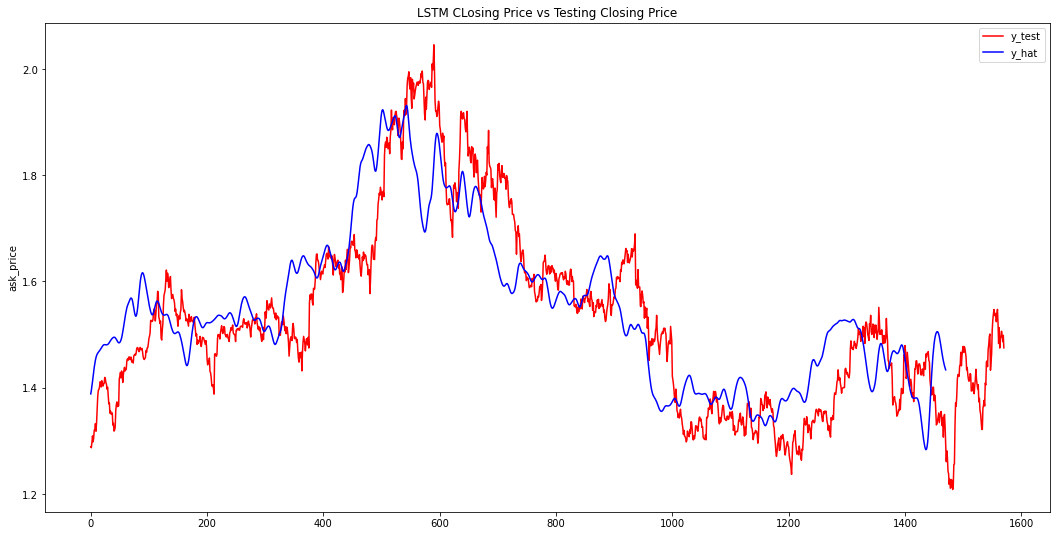

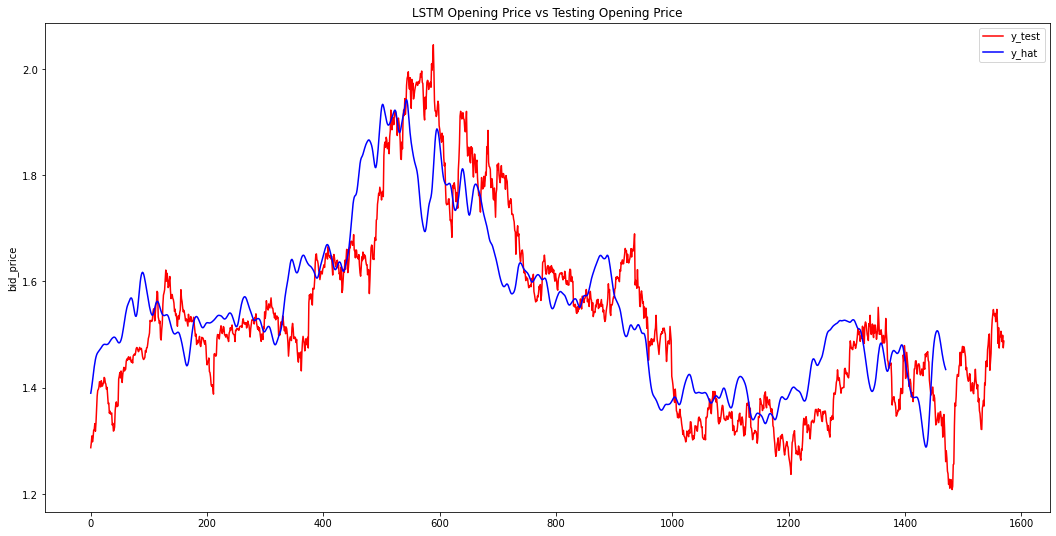

In [13]:
y_hat = model.predict(X_test)
y_hat = scaler.inverse_transform(y_hat)

y_test = test.reset_index()

plt.figure(figsize = (18,9))
plt.plot(y_test['close'], color = 'red', label = 'y_test')
plt.plot(y_hat[:,0], color = 'blue', label = 'y_hat')
plt.title('LSTM CLosing Price vs Testing Closing Price')
plt.ylabel('ask_price')
plt.legend()
plt.show()

plt.figure(figsize = (18,9))
plt.plot(y_test['open'], color = 'red', label = 'y_test')
plt.plot(y_hat[:,3], color = 'blue', label = 'y_hat')
plt.title('LSTM Opening Price vs Testing Opening Price')
plt.ylabel('bid_price')
plt.legend()
plt.show()
